AXEL DANIEL NUÑO ARRIETA | T035859

**Global Cars Dataset - Análisis Exploratorio de Datos (EDA) y Pipelines de Preprocesamiento**

Este conjunto de datos es una recopilación sintética de información sobre especificaciones y precios de automóviles. Incluye una amplia variedad de marcas, tipos de combustible y estilos de carrocería, correspondientes a vehículos fabricados entre 2005 y 2025. Fue creado con fines de análisis exploratorio, así como para desarrollar modelos de regresión, clasificación y ingeniería de características dentro de proyectos de ciencia de datos y aprendizaje automático.

https://www.kaggle.com/datasets/syedaeman2212/global-cars-data

1. lo que hacemos en este bloque es importar las librerías necesarias para llevar a cabo el análisis exploratorio de datos, la visualización de variables y la construcción del pipeline de preprocesamiento y del modelo de machine learning. Se utilizan bibliotecas ampliamente adoptadas en ciencia de datos como pandas para la manipulación de datos, matplotlib y seaborn para la generación de visualizaciones, y scikit-learn para la implementación de técnicas de preprocesamiento, partición del dataset y entrenamiento del modelo. El uso de estas librerías permite seguir buenas prácticas y garantizar la reproducibilidad del análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

2. cargamos el conjunto de datos Global Cars Dataset a partir de un archivo CSV. Este dataset contiene información sintética sobre automóviles fabricados entre los años 2005 y 2025, incluyendo variables técnicas, categóricas y de precio. A partir de este punto, el conjunto de datos queda disponible para su exploración, análisis y posterior modelado.

In [2]:
data = pd.read_csv('global_cars_dataset_synthetic.csv')

3. Aquí tenemos como objetivo obtener un primer panorama del conjunto de datos. Mediante el uso de data.info() se identifican el número total de registros, el tipo de dato de cada columna y la presencia de valores nulos. Posteriormente, con data.describe() se genera un resumen estadístico de las variables numéricas, lo que permite observar rangos, valores promedio y dispersión. Esta información es fundamental para entender la estructura del dataset antes de realizar cualquier transformación.

In [3]:
data.info()
data.describe().T

<class 'pandas.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Car_ID                 300 non-null    str  
 1   Brand                  300 non-null    str  
 2   Manufacture_Year       300 non-null    int64
 3   Body_Type              300 non-null    str  
 4   Fuel_Type              300 non-null    str  
 5   Transmission           300 non-null    str  
 6   Engine_CC              300 non-null    int64
 7   Horsepower             300 non-null    int64
 8   Mileage_km_per_l       300 non-null    int64
 9   Price_USD              300 non-null    int64
 10  Manufacturing_Country  300 non-null    str  
dtypes: int64(5), str(6)
memory usage: 25.9 KB


,count,mean,std,min,25%,50%,75%,max
Manufacture_Year,300.0,2015.123333,5.966023,2005.0,2010.00,2015.0,2020.00,2025.0
Engine_CC,300.0,3052.880000,1117.937497,1001.0,2074.00,3117.5,3964.00,4994.0
Horsepower,300.0,328.346667,153.202644,70.0,188.25,329.5,454.75,599.0
Mileage_km_per_l,300.0,19.716667,6.028061,10.0,15.00,19.5,24.00,30.0
Price_USD,300.0,60848.823333,34445.525598,5221.0,29418.50,59179.5,89692.25,119587.0


In [4]:
# Definimos las columnas numéricas y categóricas para el análisis
numerical_cols = [
    'Manufacture_Year',
    'Engine_CC',
    'Horsepower',
    'Mileage_km_per_l'
]

categorical_cols = [
    'Brand',
    'Body_Type',
    'Fuel_Type',
    'Transmission'
]

4. Aquí analizamos las distribuciones de las variables numéricas seleccionadas para el problema, utilizando histogramas con estimación de densidad. Estas visualizaciones permiten identificar la forma de las distribuciones, posibles sesgos y la presencia de valores extremos. El análisis muestra una variedad considerable en características como la potencia del motor y el cilindraje, así como una concentración mayor de vehículos fabricados en años recientes.

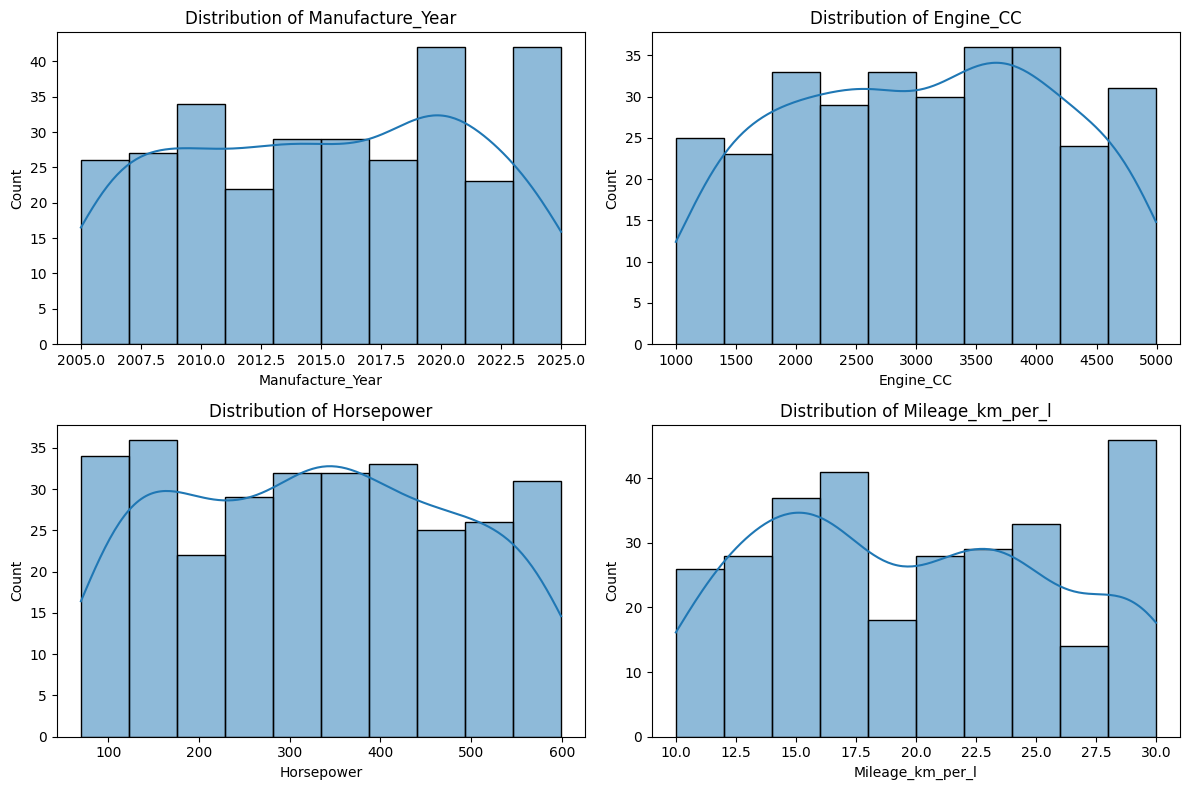

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()

5. Aquí se examina la distribución de las variables categóricas mediante gráficos de conteo. Estas visualizaciones permiten observar la frecuencia de cada categoría dentro de variables como la marca, el tipo de carrocería, el tipo de combustible y la transmisión. El análisis indica que las categorías se encuentran relativamente balanceadas, lo cual es favorable para el entrenamiento de un modelo de machine learning basado en codificación one-hot.

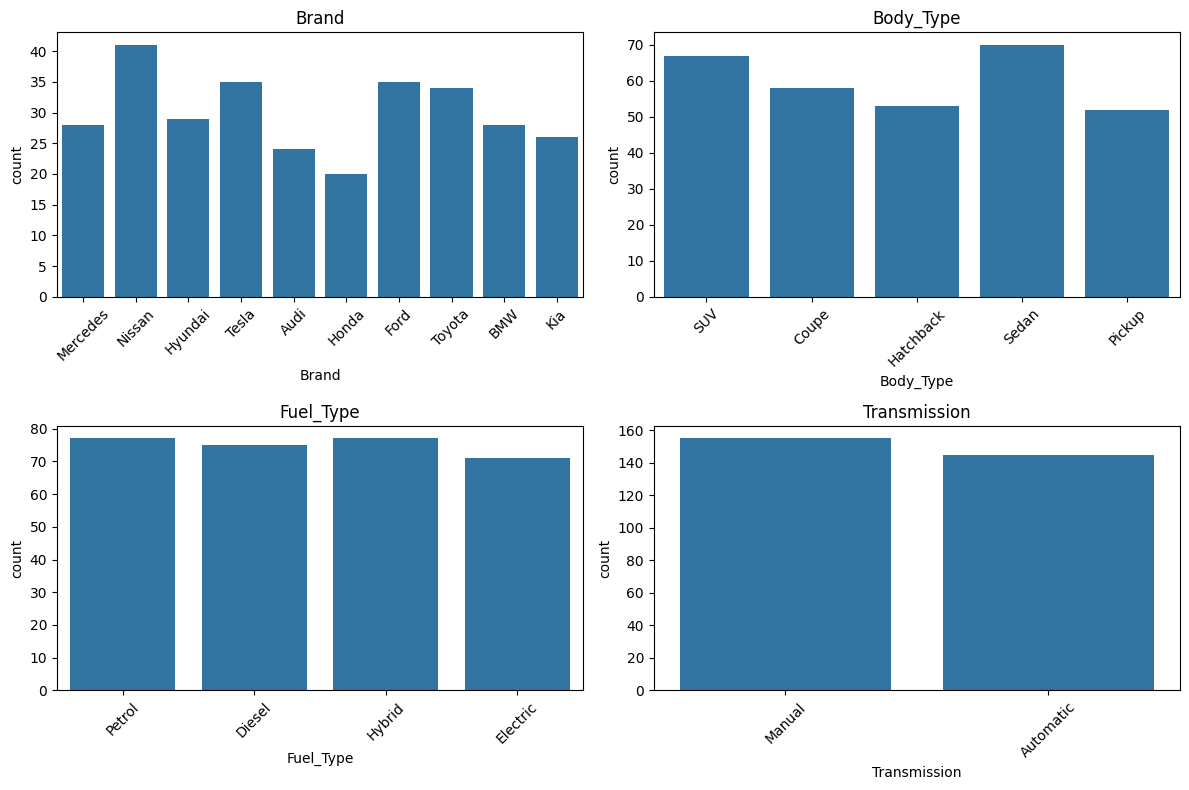

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

6. En este caso nos enfocamos en analizar la presencia de valores nulos o faltantes en el conjunto de datos. A partir del conteo y porcentaje de valores nulos por columna, se observa que el dataset no presenta valores faltantes. A pesar de ello, el análisis se incluye como parte del EDA para documentar la calidad de los datos y justificar las decisiones tomadas en el preprocesamiento.

Car_ID                   0.0
Brand                    0.0
Manufacture_Year         0.0
Body_Type                0.0
Fuel_Type                0.0
Transmission             0.0
Engine_CC                0.0
Horsepower               0.0
Mileage_km_per_l         0.0
Price_USD                0.0
Manufacturing_Country    0.0
dtype: float64

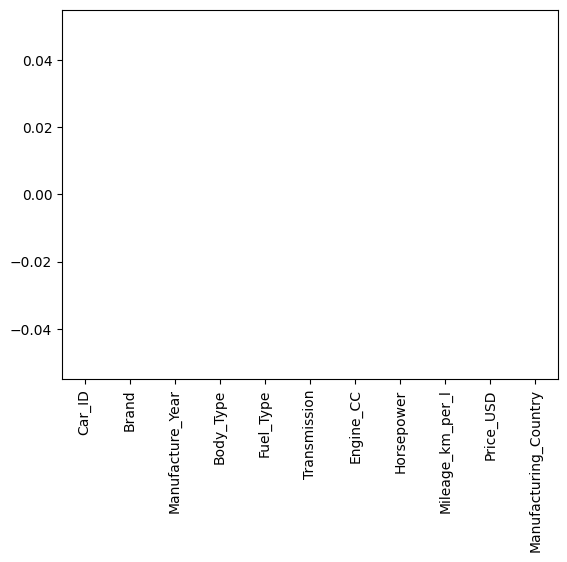

In [7]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

data.isnull().mean() * 100

7. En este bloque se define el pipeline de preprocesamiento utilizando un ColumnTransformer, el cual permite aplicar diferentes transformaciones a las variables numéricas y categóricas. Para las variables numéricas se emplea la imputación por la media y la estandarización, mientras que para las variables categóricas se utiliza imputación por la moda y codificación one hot. Esta estructura asegura un flujo de preprocesamiento claro y evita problemas de data leakage.

In [8]:
# definimos el pipeline de preprocesamiento, con esto aplicamos transformaciones distintas según el tipo de variable 
#ya sea numérica o categórica
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        # transf para variables numéricas.
        ('num', make_pipeline(
            # SimpleImputer con estrategia 'mean', se utiliza la media para manejar posibles valores faltantes en variables
            SimpleImputer(strategy='mean'),
            # StandardScaler, se aplica estandarización para que todas las variables numéricas
            # queden en una escala comparable, evitando que aquellas con valores más grandes influyan de forma desproporcionada en el modelo.
            StandardScaler()
        ), numerical_cols),
        
        # transf para variables categ
        # Estas columnas contienen información que debe transformars antes de poder ser utilizada por el modelo.
        ('cat', make_pipeline(
            # SimpleImputer con estrategia 'most_frequent', en variables categóricas, se reemplazan posibles valores faltantes
            # utilizando la categoría más común, manteniendo coherencia en los datos.
            SimpleImputer(strategy='most_frequent'),
            
            # OneHotEncoder convierte las variables categóricas en columnas binarias para que
            # el modelo de regresión pueda interpretarlas correctamente.
            # El parámetro handle_unknown='ignore' evita errores si aparecen
            # categorías nuevas en el conjunto de prueba.
            OneHotEncoder(handle_unknown='ignore')
        ), categorical_cols)
    ]
)

8. En este bloque se separan las variables predictoras y la variable objetivo. Las variables independientes incluyen tanto características numéricas como categóricas relacionadas con el vehículo, mientras que la variable dependiente es el precio del automóvil en dólares. Esta separación es necesaria para poder entrenar un modelo supervisado de regresión.

In [17]:
X = data[numerical_cols + categorical_cols]
y = data['Price_USD']

9. En este bloque el conjunto de datos se divide en subconjuntos de entrenamiento y prueba. Se utiliza una proporción del 80% para entrenamiento y 20% para prueba, lo que permite evaluar el comportamiento del modelo sobre datos no vistos. Esta partición es un paso esencial para validar la capacidad de generalización del modelo.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

BREVE NOTA: En el siguiente bloque se muestran los datos después de aplicar el pipeline de preprocesamiento. Las variables numéricas han sido estandarizadas, por lo que ahora se expresan en una escala común alrededor de la media, lo que explica la presencia de valores positivos y negativos. Esto permite que ninguna variable domine al modelo por su magnitud. Las variables categóricas fueron transformadas en columnas binarias mediante One-Hot Encoding, donde el valor 1 indica la presencia de una categoría específica y el 0 su ausencia. El resultado es un conjunto de datos completamente numérico, listo para ser utilizado por el modelo de regresión.

In [16]:
# aplicamos únicamente el pipeline de preprocesamiento al conjunto de entrenamiento
X_transformed = preprocessing_pipeline.fit_transform(X_train)

# obtenemos los nombres de las columnas numéricas (se mantienen igual)
num_features = numerical_cols

# obtenemos los nombres generados por OneHotEncoder para las variables categóricas
cat_features = preprocessing_pipeline.named_transformers_['cat'] \
    .named_steps['onehotencoder'] \
    .get_feature_names_out(categorical_cols)

# unimos todas las columnas finales (numéricas + categóricas codificadas)
all_features = list(num_features) + list(cat_features)

# convertimos el resultado en un DataFrame para poder visualizarlo mejor
X_transformed_df = pd.DataFrame(
    X_transformed.toarray() if hasattr(X_transformed, "toarray") else X_transformed,
    columns=all_features
)

X_transformed_df.head()

,Manufacture_Year,Engine_CC,Horsepower,Mileage_km_per_l,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,...,Body_Type_Hatchback,Body_Type_Pickup,Body_Type_SUV,Body_Type_Sedan,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,1.632775,0.105647,-0.966359,0.226015,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.129453,0.501051,-0.609029,-0.611077,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.705726,1.239668,0.047157,1.565361,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.964632,1.428081,-0.108769,0.728269,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.872762,1.082214,0.534423,0.728269,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


10. Aquí se construye el modelo de machine learning integrando el pipeline de preprocesamiento con un modelo de regresión lineal. Al encapsular ambas etapas dentro de un solo pipeline, se garantiza que todas las transformaciones se apliquen correctamente durante el entrenamiento y la predicción, manteniendo un flujo de trabajo limpio y reproducible.

In [19]:
model = make_pipeline(
    preprocessing_pipeline,
    LinearRegression()
)

11. En este bloque se entrena el modelo de regresión lineal utilizando el conjunto de entrenamiento. Durante este proceso, el pipeline aplica automáticamente las transformaciones definidas previamente y ajusta el modelo a los datos, aprendiendo la relación entre las características del vehículo y su precio.

In [20]:
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different

12. En este bloque se generan las predicciones del modelo sobre el conjunto de prueba y se construye una tabla comparativa entre los precios reales y los precios estimados. Esta comparación permite observar de forma cualitativa el comportamiento del modelo y cerrar el flujo completo del proyecto, desde la carga de datos hasta la generación de predicciones.

In [21]:
y_pred = model.predict(X_test)

results = X_test.copy()
results['Price_Actual'] = y_test.values
results['Price_Predicted'] = y_pred

results.head()

,Manufacture_Year,Engine_CC,Horsepower,Mileage_km_per_l,Brand,Body_Type,Fuel_Type,Transmission,Price_Actual,Price_Predicted
203,2025,3297,212,24,Audi,Coupe,Electric,Automatic,14652,56416.390327
266,2020,2423,205,24,Ford,Sedan,Hybrid,Manual,38970,63173.714531
152,2009,4061,164,10,Toyota,Coupe,Diesel,Automatic,100637,72297.602549
9,2020,4254,116,17,Honda,Sedan,Electric,Manual,8511,57970.391623
233,2019,2004,245,16,Nissan,Sedan,Electric,Automatic,108928,54770.970138


**Conclusión y hallazgos obtenidos**

En este mini proyecto se trabajó con un conjunto de datos de automóviles que combina características técnicas y comerciales para entender cómo distintos factores influyen en el precio de un vehículo. A lo largo del análisis fue posible familiarizarse con la estructura del dataset, identificar los tipos de variables disponibles y validar que los datos se encontraban completos y bien organizados, lo que facilitó el desarrollo del resto del trabajo. Las visualizaciones ayudaron a identificar patrones claros, como la variabilidad en la potencia y el cilindraje de los motores, así como una mayor presencia de vehículos de años recientes. También se observó que variables categóricas como la marca, el tipo de carrocería o la transmisión aportan información importante y de uso, pero requieren una transformación acorde para poder ser utilizadas por un modelo de machine learning. El diseño del pipeline de preprocesamiento permitió integrar de manera correcta todas las transformaciones necesarias, asegurando que los datos numéricos y categóricos se traten de forma coherente y evitando errores comunes como el data leakage. Al encapsular todo el proceso dentro de un solo pipeline, el flujo de trabajo se mantuvo limpio, reproducible y fácil de seguir. Finalmente, se entrenó un modelo de regresión lineal que permitió generar predicciones sobre el precio de los vehículos. Más allá del modelo en sí, este ejercicio me hizo ver la importancia de comprender los datos antes de modelarlos y demuestra cómo un buen EDA y un preprocesamiento bien planteado son tan importantes como el algoritmo utilizado.

